In [23]:
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [2]:
nifty50 = pd.read_csv("MW-NIFTY-50-16-Feb-2025.csv")

In [3]:
tickers = nifty50['SYMBOL \n'].unique()
tickers = [i + '.NS' for i in tickers]
tickers.remove('NIFTY 50.NS')

In [4]:
stock_data = yf.download(tickers,start='2023-01-01',end='2025-01-01')['Close']
#stock_data

[*********************100%***********************]  50 of 50 completed


In [5]:
returns = np.log(stock_data/stock_data.shift(1)).dropna()
returns.head()

Ticker,ADANIENT.NS,ADANIPORTS.NS,APOLLOHOSP.NS,ASIANPAINT.NS,AXISBANK.NS,BAJAJ-AUTO.NS,BAJAJFINSV.NS,BAJFINANCE.NS,BEL.NS,BHARTIARTL.NS,...,SUNPHARMA.NS,TATACONSUM.NS,TATAMOTORS.NS,TATASTEEL.NS,TCS.NS,TECHM.NS,TITAN.NS,TRENT.NS,ULTRACEMCO.NS,WIPRO.NS
Date,,,,,,,,,,,,,,,,,,,,,
2023-01-03,-0.002672,-0.002252,0.008172,-0.006255,0.021746,0.007735,0.006740,0.007979,0.000997,0.005027,...,0.012063,0.006342,-0.002282,-0.006731,0.015184,0.014066,0.018478,0.003904,-0.003476,0.010125
2023-01-04,-0.001019,-0.012819,-0.012909,-0.003772,-0.005053,-0.013656,-0.009740,-0.005350,-0.016073,-0.007119,...,-0.004967,-0.006408,-0.021296,-0.023058,0.000996,-0.003424,-0.006160,-0.030136,0.001679,-0.018685
2023-01-05,0.000718,0.011782,-0.000959,-0.004152,-0.008285,0.019041,-0.052387,-0.074369,0.012079,-0.005807,...,0.011979,0.002097,0.003366,0.006888,-0.001071,-0.008514,-0.013741,-0.021259,0.000235,-0.007211
2023-01-06,-0.001450,-0.016609,-0.009437,-0.008675,-0.010215,0.005810,-0.026561,-0.019809,-0.010055,-0.013848,...,-0.007408,-0.003278,-0.012746,-0.007752,-0.030527,-0.025529,-0.009411,-0.025119,-0.003546,-0.012746
2023-01-09,0.008086,0.013003,0.004605,0.001929,0.019857,-0.005920,-0.011497,0.002163,0.010556,0.028973,...,0.008047,0.007328,0.019315,0.016295,0.033196,0.029082,-0.021284,-0.023017,0.007512,0.025331


In [6]:
scaler = StandardScaler()
returns_scaled = scaler.fit_transform(returns)

In [7]:
pca = PCA()
pca.fit(returns_scaled)

PCA()

In [8]:
explained_variance = np.cumsum(pca.explained_variance_ratio_)

In [9]:
explained_variance

array([0.25863887, 0.32607688, 0.37635399, 0.41781588, 0.45146593,
       0.48186005, 0.51105961, 0.53620058, 0.559454  , 0.58065061,
       0.59995781, 0.61882232, 0.63699981, 0.65455477, 0.67136235,
       0.68772822, 0.70332422, 0.71848159, 0.73325735, 0.74779567,
       0.76199637, 0.77532595, 0.78791059, 0.80027745, 0.81220938,
       0.82376141, 0.83492618, 0.84553644, 0.85587691, 0.8660667 ,
       0.87611284, 0.88579849, 0.89515328, 0.90412838, 0.91264838,
       0.92091719, 0.92900382, 0.93642789, 0.94373642, 0.95079838,
       0.95733772, 0.9635205 , 0.96951454, 0.97504696, 0.98018754,
       0.98497218, 0.98955561, 0.99343696, 0.99713576, 1.        ])

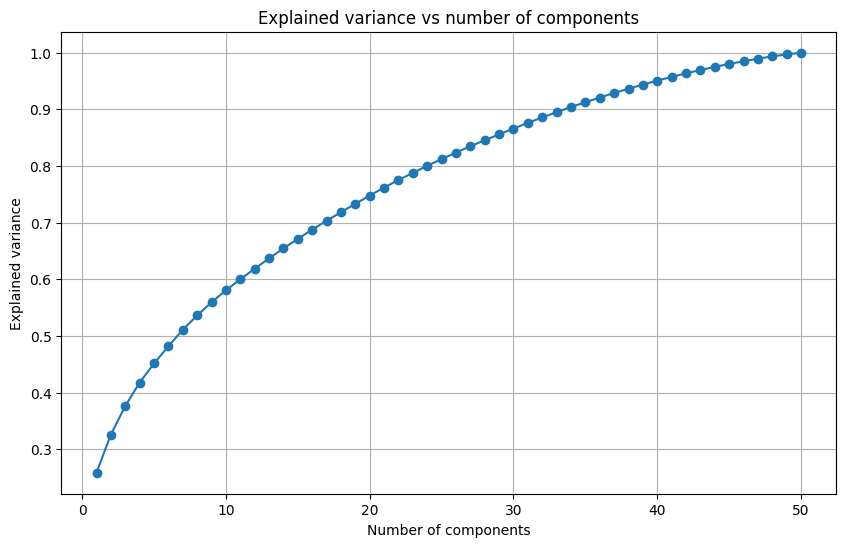

In [10]:
plt.figure(figsize=(10,6))
plt.plot(range(1,len(explained_variance)+1),explained_variance,marker='o',linestyle='-')
plt.xlabel("Number of components")
plt.ylabel("Explained variance")
plt.title("Explained variance vs number of components")
plt.grid(True)
plt.show()

In [16]:
def calculate_portfolio_pca(port_returns):
    scaler = StandardScaler()
    scaled_ret = scaler.fit_transform(port_returns)

    pca = PCA()
    pca.fit(scaled_ret)

    explained_variance = pca.explained_variance_ratio_
    cumulative_variance = np.cumsum(explained_variance)

    n_components_for_90 = np.argmax(cumulative_variance >= 0.9) + 1
    first_variance = cumulative_variance[0]
    first_five_variance = cumulative_variance[4]

    return {
        'explained_variance': explained_variance,
        'cumulative_variance': cumulative_variance,
        'n_components_for_90': n_components_for_90,
        'first_variance': first_variance,
        'first_five_variance': first_five_variance
    }

In [17]:
def analyze_portfolios_pca(returns_data,n_portfolios=1000,portfolio_size=15):

    portfolio_data = []
    all_stocks = returns_data.columns.tolist()
    
    for i in range(n_portfolios):
        portfolio_stocks = random.sample(all_stocks,portfolio_size)
        portfolio_returns = returns_data[portfolio_stocks]

        pca_metrics = calculate_portfolio_pca(portfolio_returns)
        portfolio_data.append({'portfolio_id':i,'stocks':portfolio_stocks,**pca_metrics})

    return pd.DataFrame(portfolio_data)

In [26]:
def calculate_portfolio_stats(portfolios):
    
    most_diversified_index = portfolios['first_variance'].idxmin()
    most_diversified_portfolio = portfolios.iloc[most_diversified_index]

    least_diversified_index = portfolios['first_variance'].idxmax()
    least_diversified_portfolio = portfolios.iloc[least_diversified_index]

    avg_components_for_90 = portfolios['n_components_for_90'].mean()
    avg_first_component_variance = portfolios['first_variance'].mean()
    avg_first_five_variance = portfolios['first_five_variance'].mean()

    return {'most_diversified':most_diversified_portfolio,
            'least_diversified':least_diversified_portfolio,
            'summary_stats': {
                'avg_components_for_90':avg_components_for_90,
                'avg_first_component_variance':avg_first_component_variance,
                'avg_first_five_variance':avg_first_five_variance
            }
           }

In [39]:
def visualize_pca_result(pca_result,pca_stats):

    fig, axes = plt.subplots(1,2,figsize=(14,6))
    
    sns.histplot(pca_result['first_variance'], bins=30,kde=True, alpha=0.6, ax = axes[0])
    axes[0].axvline(pca_result['first_variance'].mean(), color='red', linestyle='--', label='Mean PC1 Variance')
    axes[0].set_xlabel('Explained Variance by PC1')
    axes[0].set_ylabel('Frequency')
    axes[0].set_title('Distribution of PC1 Explained Variance')
    axes[0].legend()
    
    sns.histplot(pca_result['first_five_variance'], bins=30,kde=True, alpha=0.6, ax = axes[1]) 
    axes[1].axvline(pca_result['first_five_variance'].mean(), color='red', linestyle='--', label='Mean PC1-PC5 Variance')
    axes[1].set_xlabel('Explained Variance by PC1-PC5')
    axes[1].set_ylabel('Frequency')
    axes[1].set_title('Distribution of PC1-PC5 Explained Variance')
    
    plt.tight_layout()
    plt.show()

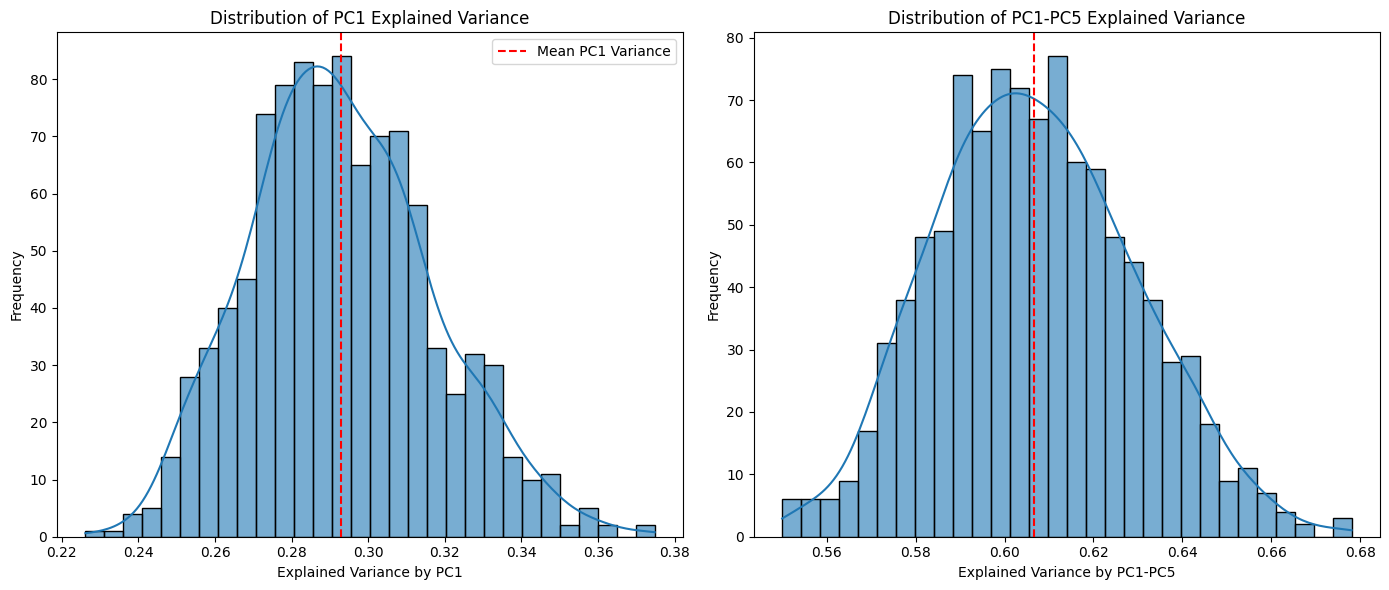

In [40]:
pca_result = analyze_portfolios_pca(returns)
pca_stats = calculate_portfolio_stats(pca_result)
visualize_pca_result(pca_result,pca_stats)

In [41]:
nifty500 = pd.read_csv('MW-NIFTY-500-16-Feb-2025.csv')
tickers = nifty500['SYMBOL \n'].unique()
tickers = [i + '.NS' for i in tickers]
tickers.remove('NIFTY 500.NS')

In [42]:
stock_data = yf.download(tickers,start='2020-01-01',end='2025-01-01')['Close']
returns = np.log(stock_data/stock_data.shift(1)).dropna()

[*********************100%***********************]  500 of 500 completed


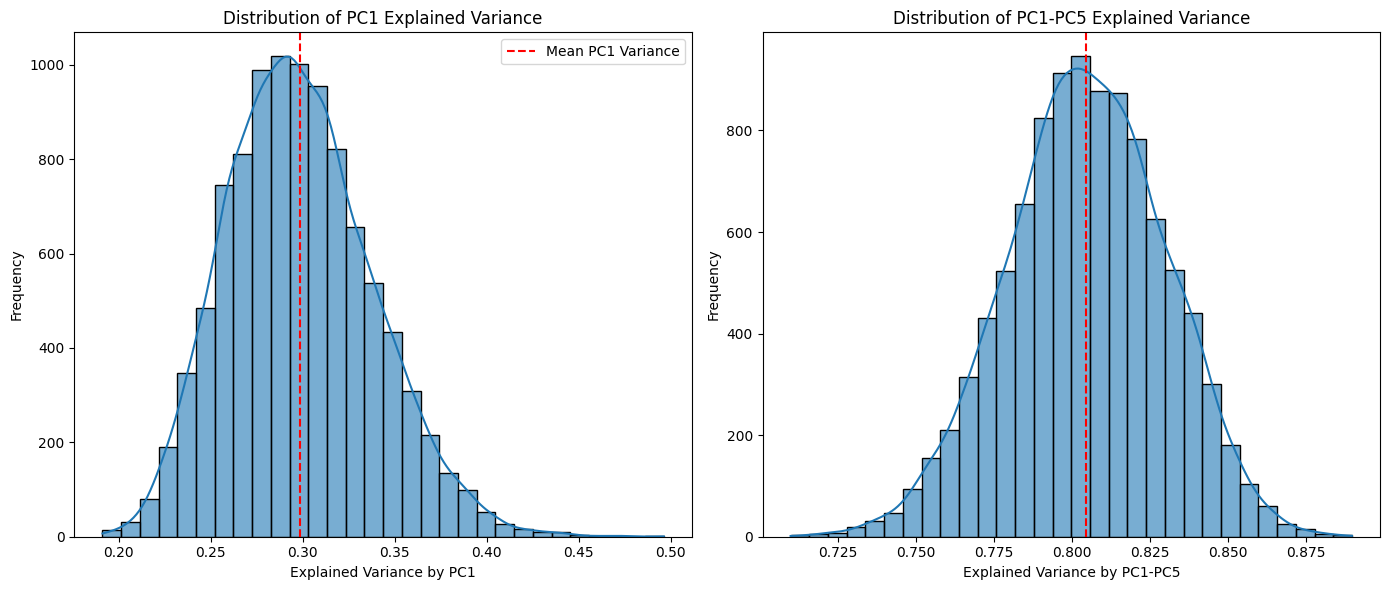

In [46]:
pca_result = analyze_portfolios_pca(returns,10000,20)
pca_stats = calculate_portfolio_stats(pca_result)
visualize_pca_result(pca_result,pca_stats)